<a href="https://colab.research.google.com/github/neetmadann/neetmadan.github.io/blob/main/Final_Machine_Learning_with_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preprocessing, ESDA and Machine Learning Model

## Import All Packages

In [ ]:
type(df3)

pandas.core.frame.DataFrame

# Results: Machine Learning Models

## Lasso Regression

#### Lasso Regression for Original Features 

In [ ]:
i = [0,1,2,3]
results_train = list()
results_test = list()
for i in df1['cluster_label'].unique():
    test = df1[df1['cluster_label'] == i]
    X_test = test.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    features = X_test.columns
    y_test = test['car_by_pop']
    train= df1[df1['cluster_label'] != i]
    X_train = train.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_train = train['car_by_pop']
    y_train= y_train.values.reshape(-1,1)
    y_test= y_test.values.reshape(-1,1)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    y_train = sc_X.fit_transform(y_train)
    y_test = sc_y.fit_transform(y_test)
    lasso_model1 = Lasso(alpha = 0.001)
    lasso_model1.fit(X_train,y_train)
    train_score=lasso_model1.score(X_train,y_train)
    test_score=lasso_model1.score(X_test,y_test)
    coeff_used = np.sum(lasso_model1.coef_!=0)
    print('only Original Factors')
    print('')
    print('training score Fold',i+1,':',train_score)
    print('test score Fold',i+1,':', test_score)
    print('number of features Fold',i+1,':', coeff_used)
    results_train.append(train_score)
    results_test.append(test_score)
print('')
print("training score mean:", np.mean(results_train))
print("testing score mean:", np.mean(results_test))
lasso_orig_acc_train = results_train
lasso_orig_acc_test = results_test

lasso_mean_orig_train = np.mean(results_train) #final train score for all folds
lasso_mean_orig_test = np.mean(results_test) #final test score for all folds

only Original Factors

training score Fold 1 : 0.859520922288507
test score Fold 1 : 0.8189522052242113
number of features Fold 1 : 25
only Original Factors

training score Fold 2 : 0.8558156523814595
test score Fold 2 : 0.7675625058705998
number of features Fold 2 : 23
only Original Factors

training score Fold 3 : 0.8626095329993035
test score Fold 3 : 0.8078298314155758
number of features Fold 3 : 22
only Original Factors

training score Fold 4 : 0.8545491369828699
test score Fold 4 : 0.8116393144383313
number of features Fold 4 : 24

training score mean: 0.8581238111630349
testing score mean: 0.8014959642371796


#### Lasso Regression for Urban Form Features

In [ ]:
from sklearn import metrics
i = [0,1,2,3]
results_train = list()
results_test = list()
results_mse = list()
results_mae = list()
y_pred_list = list()
y_test_list = list()
results_r2_list = list()

for i in df3['cluster_label'].unique():
    test = df3[df3['cluster_label'] == i]
   
    X_test = test.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    features = X_test.columns
    y_test = test['car_by_pop']
    train= df3[df3['cluster_label'] != i]
    X_train = train.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_train = train['car_by_pop']
    y_train= y_train.values.reshape(-1,1)
    y_test= y_test.values.reshape(-1,1)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    y_train = sc_X.fit_transform(y_train)
    y_test = sc_y.fit_transform(y_test)
    lasso_all = Lasso(alpha = 0.01)
    lasso_all.fit(X_train,y_train)
    train_score=lasso_all.score(X_train,y_train)
    test_score=lasso_all.score(X_test,y_test)
    coeff_used = np.sum(lasso_all.coef_!=0)
    y_pred = lasso_all.predict(X_test)
    mse_score = metrics.mean_squared_error(y_test, y_pred)
    mae_score = metrics.mean_absolute_error(y_test, y_pred)
    r2score = metrics.r2_score(y_test, y_pred)
    globals()["p" + str(i)] = lasso_all.coef_
    print('Only Urban Form Features')
    print('')
    print('training score Fold',i+1,':',train_score)
    print('test score Fold',i+1,':', test_score)
    print('number of features Fold',i+1,':', coeff_used)
    print('MSE score',i+1,':',mse_score)
    print('MAE score',i+1,':',mae_score)
    print('r2 score',i+1,':', r2score)

    
    results_train.append(train_score)
    results_test.append(test_score)
    results_mse.append(mse_score)
    results_mae.append(mae_score)
    results_r2_list.append(r2score)
    y_pred_list.append(y_pred)
    y_test_list.append(y_test)
    
    y_test_list.append(y_test)
print('')
print("training score mean:", np.mean(results_train))
print("testing score mean:", np.mean(results_test))
print("MSE All Fold:", np.mean(results_mse))
print("MAE All Fold:", np.mean(results_mae))

lasso_urb_train = results_train
lasso_urb_test = results_test


lasso_mean_urb_train = np.mean(results_train) #final train score for all folds
lasso_mean_urb_test = np.mean(results_test) #final test score for all folds

Only Urban Form Features

training score Fold 1 : 0.7916139804028521
test score Fold 1 : 0.7138282458368772
number of features Fold 1 : 25
MSE score 1 : 0.2861717541631229
MAE score 1 : 0.38594970311334154
r2 score 1 : 0.7138282458368772
Only Urban Form Features

training score Fold 2 : 0.7425898063625805
test score Fold 2 : 0.7800256150722832
number of features Fold 2 : 26
MSE score 2 : 0.2199743849277168
MAE score 2 : 0.35085012089086565
r2 score 2 : 0.7800256150722832
Only Urban Form Features

training score Fold 3 : 0.8004003384465515
test score Fold 3 : 0.6778032679620605
number of features Fold 3 : 24
MSE score 3 : 0.32219673203793947
MAE score 3 : 0.41942890863873206
r2 score 3 : 0.6778032679620605
Only Urban Form Features

training score Fold 4 : 0.7828236355225839
test score Fold 4 : 0.7061185730946361
number of features Fold 4 : 26
MSE score 4 : 0.2938814269053639
MAE score 4 : 0.3932352329672884
r2 score 4 : 0.7061185730946361

training score mean: 0.779356940183642
testing 

#### Lasso Regression for All Features and Feature Importance Analysis 

In [ ]:
from sklearn import metrics
i = [0,1,2,3] #cluster number list for kfold to take as test data set 
results_train = list()
results_test = list()
results_mse = list()
results_mae = list()
results_r2_list = list()

msoa11cd_list = list()
cluster_nolist= list()
y_pred_list = list()
y_test_list = list()
coef_list = list()
for i in df2['cluster_label'].unique(): #run all folds until all cluster label becomes test data k times
    print('test cluster:',i)
    test = df2[df2['cluster_label'] == i] #separate test data
    cluster_no = test['cluster_label'].tolist()
    msoa11cd = test['MSOA11CD'].tolist()
    X_test = test.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)#drop unnecessary columns
    features = X_test.columns #save feature names
    y_test = test['car_by_pop']
    train= df2[df2['cluster_label'] != i] #rain always removes test data k-1
    X_train = train.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_train = train['car_by_pop']
    y_train= y_train.values.reshape(-1,1)
    y_test= y_test.values.reshape(-1,1)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    y_train = sc_X.fit_transform(y_train)
    y_test = sc_y.fit_transform(y_test)
    lasso_all = Lasso(alpha = 0.01)
    lasso_all.fit(X_train,y_train)
    train_score=lasso_all.score(X_train,y_train)
    test_score=lasso_all.score(X_test,y_test)
    coeff_used = np.sum(lasso_all.coef_!=0)
    y_pred = lasso_all.predict(X_test)
    
    mse_score = metrics.mean_squared_error(y_test, y_pred)
    mae_score = metrics.mean_absolute_error(y_test, y_pred)
    r2score = metrics.r2_score(y_test, y_pred)
    globals()["p" + str(i)] = lasso_all.coef_
    print('All Factors: Original Baseline Variables and Urban Form')
    print('')
    print('training score Fold',i+1,':',train_score)
    print('test score Fold',i+1,':', test_score)
    print('number of features Fold',i+1,':', coeff_used)
    print('MSE score',i+1,':',mse_score)
    print('MAE score',i+1,':',mae_score)
    print('r2 score',i+1,':', r2score)
    results_train.append(train_score)
    results_test.append(test_score)
    results_mse.append(mse_score)
    results_mae.append(mae_score)
    coef_list.append(lasso_all.coef_)
    msoa11cd_list.extend(msoa11cd) #save msoa together with its identifier cluster no. 
    cluster_nolist.extend(cluster_no) #save pred, test data together with its identifier and cluster number
    y_pred_list.extend(y_pred.tolist()) #save pred from every loop, all clusters saved
    y_test_list.extend(y_test.tolist()) #for ease just save test for every loop

print('')
print("training score mean:", np.mean(results_train))
print("testing score mean:", np.mean(results_test))
print("MSE All Fold:", np.mean(results_mse))
print("MAE All Fold:", np.mean(results_mae))
lasso_all_train = results_train
lasso_all_test = results_test


lasso_mean_all_train = np.mean(results_train) #final train score for all folds
lasso_mean_all_test = np.mean(results_test) #final test score for all folds

test cluster: 0
All Factors: Original Baseline Variables and Urban Form

training score Fold 1 : 0.8809304042361873
test score Fold 1 : 0.8104050702616453
number of features Fold 1 : 28
MSE score 1 : 0.1895949297383547
MAE score 1 : 0.30991794644778836
r2 score 1 : 0.8104050702616453
test cluster: 1
All Factors: Original Baseline Variables and Urban Form

training score Fold 2 : 0.8625745167950488
test score Fold 2 : 0.7920031812854147
number of features Fold 2 : 30
MSE score 2 : 0.20799681871458534
MAE score 2 : 0.3481978162774864
r2 score 2 : 0.7920031812854147
test cluster: 2
All Factors: Original Baseline Variables and Urban Form

training score Fold 3 : 0.8792309079793021
test score Fold 3 : 0.8238728248003409
number of features Fold 3 : 32
MSE score 3 : 0.17612717519965918
MAE score 3 : 0.29816163302994503
r2 score 3 : 0.8238728248003409
test cluster: 3
All Factors: Original Baseline Variables and Urban Form

training score Fold 4 : 0.8711082954879269
test score Fold 4 : 0.831655

In [ ]:
#combine list of all ypredicted and ytest by MSOA from Lasso test with all features for ESDA
import numpy as np
result_lasso = pd.DataFrame(np.column_stack([msoa11cd_list, cluster_nolist, y_pred_list,y_test_list]), 
                               columns=['MSOA11CD', 'ClusterNo', 'y_pred','y_test'])
result_lasso = result_lasso.astype({'y_pred':'float','y_test':'float'})

df_msoa= gpd.GeoDataFrame(df_msoa, geometry='geometry')
result_lasso = pd.merge(df_msoa[['MSOA11CD','MSOA11NM_x','LONG_','LAT','geometry']],result_lasso,how='left',on='MSOA11CD')

In [ ]:
features = ['Age-Median',
 'popdensity',
 'household',
 'household1',
 'household2',
 'household>=3',
 'EducationAll',
 'EducationNo',
 'Education1',
 'Education2',
 'EducationAppren',
 'Education3',
 'Education4',
 'EducationOther',
 'income',
'PB_ALLFE',
 'PB_ALLGP',
 'PB_ALLHP',
 'PB_ALLEMP',
 'PB_ALLPS',
 'PB_ALLSS',
 'PB_TC',
 'PB_GFE',
 'PB_GGP',
 'PB_GHP',
 'PB_GPS',
 'PB_GSS',
'sdbAre',
 'sdbHei',
 'sdbPer',
 'sdbVol',
 'ssbFoF',
 'ssbVFR',
 'ssbCCo',
 'ssbCor',
 'ssbSqu',
 'ssbERI',
 'ssbElo',
 'ssbCCM',
 'ssbCCD',
 'stbOri',
 'sdcLAL',
 'sdcAre',
 'sicFAR',
 'sscCCo',
 'sscERI',
 'stcOri',
 'sicCAR',
 'stbCeA',
 'mtbAli',
 'mtbNDi',
 'mtcWNe',
 'mdcAre',
 'ltcWRE',
 'ltbIBD',
 'ltcRea',
 'ltcAre',
 'sdsSPW',
 'sdsSPH',
 'sdsSPO',
 'sdsSWD',
 'sdsSHD',
 'sdsSPR',
 'sdsLen',
 'sssLin',
 'ldsMSL',
 'mtdDeg',
 'lcdMes',
 'linP3W',
 'linP4W',
 'linPDE',
 'lcnClo',
 'ldsCDL',
 'xcnSCl',
 'mtdMDi',
 'lddNDe',
 'linWID',
 'ldeAre',
 'ldePer',
 'lseCCo',
 'lseERI',
 'lseCWA',
 'lteOri',
 'lteWNB',
 'lieWCe',
 'stbSAl',
 'ldbPWL',
 'mtbSWR',
 'sddAre',
 'sdsAre',
 'sisBpM',
 'misCel',
 'mdsAre',
 'lisCel',
 'ldsAre']

In [ ]:
#combine feature importance for final model for lasso all features
features = pd.DataFrame(list(features)) #change features name to list 
lasso_coef = pd.DataFrame(list(np.mean(coef_list,axis=0))) #Average coefficients of all alphas in all 4 folds
feature_model = pd.merge(features,lasso_coef,how='left',left_index=True, right_index=True) #join feature  name and coef kfold
feature_model.columns = ['feature','lasso_coef']
feature_model['feature_importance_lasso'] = feature_model['lasso_coef'].abs()
feature_model = feature_model.sort_values('feature_importance_lasso',ascending=False)
feature_model

,feature,lasso_coef,feature_importance_lasso
0,Age-Median,0.247231,0.247231
1,popdensity,-0.205555,0.205555
48,stbCeA,0.165162,0.165162
14,income,0.148846,0.148846
10,EducationAppren,0.093594,0.093594
58,sdsSPH,-0.081126,0.081126
3,household1,-0.077632,0.077632
9,Education2,0.074287,0.074287
7,EducationNo,-0.060462,0.060462
44,sscCCo,0.054797,0.054797


In [ ]:
#combine model 1, model 2, model 3 scores for lasso final score
all_lasso_models_train_score = pd.DataFrame(np.column_stack([lasso_mean_orig_train,lasso_mean_urb_train,lasso_mean_all_train]), 
                               columns=['Lasso Model 1','Lasso Model 2','Lasso Model 3'],index=['Train'])

all_lasso_models_test_score = pd.DataFrame(np.column_stack([lasso_mean_orig_test,lasso_mean_urb_test,lasso_mean_all_test]), 
                               columns=['Lasso Model 1','Lasso Model 2','Lasso Model 3'],index=['test'])

all_lasso_models_train_score.append(all_lasso_models_test_score)

,Lasso Model 1,Lasso Model 2,Lasso Model 3
Train,0.858124,0.779357,0.873461
test,0.801496,0.719444,0.814484


#### Summarize Results for Lasso

In [ ]:
lasso_orig_acc_train,lasso_urb_train,lasso_all_train
lasso_orig_acc_test,lasso_urb_test,lasso_all_test 

#combine list of all ypredicted and ytest by MSOA from Lasso test with all features for ESDA
import numpy as np
model_accuracy_test = pd.DataFrame(np.column_stack([lasso_orig_acc_test,lasso_urb_test,lasso_all_test]), 
                               columns=['lasso_original_test', 'lasso_urban_test', 'lasso_all_test'])
model_accuracy_train = pd.DataFrame(np.column_stack([lasso_orig_acc_train,lasso_urb_train,lasso_all_train]), 
                               columns=['lasso_original_train', 'lasso_urban_train', 'lasso_all_train'])


In [ ]:
lasso_model_results = pd.merge(model_accuracy_train,model_accuracy_test,how='left',left_index=True,right_index=True)

In [ ]:
lasso_model_results
lasso_model_results['Fold'] = lasso_model_results.index+1
lasso_model_results

,lasso_original_train,lasso_urban_train,lasso_all_train,lasso_original_test,lasso_urban_test,lasso_all_test,Fold
0,0.859521,0.791614,0.880930,0.818952,0.713828,0.810405,1
1,0.855816,0.742590,0.862575,0.767563,0.780026,0.792003,2
2,0.862610,0.800400,0.879231,0.807830,0.677803,0.823873,3
3,0.854549,0.782824,0.871108,0.811639,0.706119,0.831656,4


## Rainforest

#### Rainforest Regression for Original Features 

In [ ]:
i = [0,1,2,3]
results_train = list() #list for train score for all folds
results_test = list()  #list for test score for all folds
results_mse = list() #list for mse score for all folds
results_mae = list() #list for mae score for all folds
results_r2_list = list()

for i in df1['cluster_label'].unique():
    test = df1[df1['cluster_label'] == i]
    X_test = test.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_test = test['car_by_pop']
    train= df1[df1['cluster_label'] != i]
    X_train = train.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_train = train['car_by_pop']
    y_train= np.ravel(y_train.values.reshape(-1,1))
    y_test= np.ravel(y_test.values.reshape(-1,1))
    regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = metrics.mean_squared_error(y_test, y_pred)
    mae_score = metrics.mean_absolute_error(y_test, y_pred)
    r2score = metrics.r2_score(y_test, y_pred)
    train_score = regressor.score(X_train, y_train)
    print("R-squared:", score) 
    test_score=regressor.score(X_test,y_test)
    print('Only Original Factors')
    print('')
    print('training score Fold',i+1,':',train_score)
    print('test score Fold',i+1,':', test_score)
    print('MSE score',i+1,':',mse_score)
    print('MAE score',i+1,':',mae_score)
    print('r2 score',i+1,':', r2score)
    print('')
    results_train.append(train_score)
    results_test.append(test_score)
    results_mse.append(mse_score)
    results_mae.append(mae_score)
    results_r2_list.append(r2score)
print('')
print("training score mean:", np.mean(results_train))
print("testing score mean:", np.mean(results_test))
print("MSE All Fold:", np.mean(results_mse))
print("MAE All Fold:", np.mean(results_mae))
rf_orig_train = results_train #save test score of every fold
rf_orig_test = results_test #save test score of every fold

rf_mean_orig_train = np.mean(results_train)
rf_main_orig_test = np.mean(results_test)

rf_mean_orig_train = np.mean(results_train) #final train score for all folds
rf_mean_orig_test = np.mean(results_test) #final test score for all folds

R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
Only Original Factors

training score Fold 1 : 0.9847060896171183
test score Fold 1 : 0.8292317135447822
MSE score 1 : 0.002622554647603144
MAE score 1 : 0.0350073262366938
r2 score 1 : 0.8292317135447822

R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
Only Original Factors

training score Fold 2 : 0.980557095167241
test score Fold 2 : 0.6762287005685335
MSE score 2 : 0.008313668508707387
MAE score 2 : 0.06793348050036793
r2 score 2 : 0.6762287005685335

R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.3081357323556

In [ ]:
train['cluster_label'].unique() #double check if k-1 works, last kfold takes out cluster 3 or the 4th cluster
#adds it to test

array([0, 1, 2])

#### Rainforest Regression for Urban features

In [ ]:
i = [0,1,2,3]
results_train = list()
results_test = list()
results_mse = list()
results_mae = list()
results_r2_list = list()

for i in df3['cluster_label'].unique():
    test = df3[df3['cluster_label'] == i]
    X_test = test.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_test = test['car_by_pop']
    train= df3[df3['cluster_label'] != i]
    X_train = train.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_train = train['car_by_pop']
    y_train= np.ravel(y_train.values.reshape(-1,1))
    y_test= np.ravel(y_test.values.reshape(-1,1))
    regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = metrics.mean_squared_error(y_test, y_pred)
    mae_score = metrics.mean_absolute_error(y_test, y_pred)
    r2score = metrics.r2_score(y_test, y_pred)
    train_score = regressor.score(X_train, y_train)
    print("R-squared:", score) 
    test_score=regressor.score(X_test,y_test)
    print('Only urban Factors')
    print('')
    print('training score Fold',i+1,':',train_score)
    print('test score Fold',i+1,':', test_score)
    print('MSE score',i+1,':',mse_score)
    print('MAE score',i+1,':',mae_score)
    print('r2 score',i+1,':', r2score)
    print('')
    results_train.append(train_score)
    results_test.append(test_score)
    results_mse.append(mse_score)
    results_mae.append(mae_score)
    results_r2_list.append(r2score)
print('')
print("training score mean:", np.mean(results_train))
print("testing score mean:", np.mean(results_test))
print("MSE All Fold:", np.mean(results_mse))
print("MAE All Fold:", np.mean(results_mae))
rf_urb_train = results_train
rf_urb_test = results_test
rf_mean_urb_train = np.mean(results_train) #final train score for all folds
rf_mean_urb_test = np.mean(results_test) #final test score for all folds

R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
Only urban Factors

training score Fold 1 : 0.9782400311273804
test score Fold 1 : 0.7533226991072941
MSE score 1 : 0.0037883187525220878
MAE score 1 : 0.04350171154247546
r2 score 1 : 0.7533226991072941

R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
Only urban Factors

training score Fold 2 : 0.9702845376436546
test score Fold 2 : 0.8101419774000996
MSE score 2 : 0.004875097534543373
MAE score 2 : 0.0523294211429973
r2 score 2 : 0.8101419774000996

R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
O

#### Rainforest Regression for All Features

In [ ]:
#rainforest doesn't need standardisation
i = [0,1,2,3]
results_train = list()
results_test = list()
results_mse = list()
results_mae = list()
results_r2_list = list()
featimp_list = list()

msoa11cd_list = list()
cluster_nolist= list()
y_pred_list = list()
y_test_list = list()

for i in df2['cluster_label'].unique():
    print('test cluster:',i)
    test = df2[df2['cluster_label'] == i]
    msoa11cd = test['MSOA11CD'].tolist()
    features = X_test.columns
    cluster_nono = test['cluster_label'].tolist()
    X_test = test.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_test = test['car_by_pop']
    train= df2[df2['cluster_label'] != i]
    X_train = train.drop(['MSOA11CD','car_by_pop','cluster_label'],axis=1)
    y_train = train['car_by_pop']
    y_train= np.ravel(y_train.values.reshape(-1,1))
    y_test= np.ravel(y_test.values.reshape(-1,1))
    regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = metrics.mean_squared_error(y_test, y_pred)
    mae_score = metrics.mean_absolute_error(y_test, y_pred)
    r2score = metrics.r2_score(y_test, y_pred)
    train_score = regressor.score(X_train, y_train)
    print("R-squared:", score) 
    test_score=regressor.score(X_test,y_test)
    print('All factors including Urban Form')
    print('')
    print('training score Fold',i+1,':',train_score)
    print('test score Fold',i+1,':', test_score)
    print('MSE score',i+1,':',mse_score)
    print('MAE score',i+1,':',mae_score)
    print('r2 score',i+1,':', r2score)
    print('')
    results_train.append(train_score)
    results_test.append(test_score)
    results_mse.append(mse_score)
    results_mae.append(mae_score)
    featimp_list.append(regressor.feature_importances_)
    results_r2_list.append(r2score)
    msoa11cd_list.extend(msoa11cd)
    cluster_nolist.extend(cluster_no)
    y_pred_list.extend(y_pred.tolist())
    y_test_list.extend(y_test.tolist())
    
print('')
print("training score mean:", np.mean(results_train))
print("testing score mean:", np.mean(results_test))
print("MSE All Fold:", np.mean(results_mse))
print("MAE All Fold:", np.mean(results_mae))
rf_all_train = results_train
rf_all_test = results_test

rf_mean_all_train = np.mean(results_train)
rf_mean_all_test = np.mean(results_test)

test cluster: 0
R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
All factors including Urban Form

training score Fold 1 : 0.9856244500342116
test score Fold 1 : 0.8329912443548089
MSE score 1 : 0.0025648180783413325
MAE score 1 : 0.034379670214986426
r2 score 1 : 0.8329912443548089

test cluster: 1
R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.641180414421, -379.08424175155403, -304.29038317186496, -245.30813573235562]
All factors including Urban Form

training score Fold 2 : 0.9811697257695231
test score Fold 2 : 0.7051192210085422
MSE score 2 : 0.007571829406835081
MAE score 2 : 0.06427285994603872
r2 score 2 : 0.7051192210085422

test cluster: 2
R-squared: [-10046.998594713712, -3277.4545958741082, -1770.9169494639518, -1213.460293139852, -723.3662609111179, -499.

In [ ]:
rf_accuracy_train = pd.DataFrame(np.column_stack([rf_orig_train,rf_urb_train,rf_all_train]), 
                               columns=['rf_original_train', 'rf_urban_train', 'rf_all_train'])
rf_accuracy_test = pd.DataFrame(np.column_stack([rf_orig_test,rf_urb_test,rf_all_test]), 
                               columns=['rf_original_test', 'rf_urban_test', 'rf_all_test'])

In [ ]:
rf_model_results = pd.merge(rf_accuracy_train,rf_accuracy_test,how='left',left_index=True,right_index=True)
rf_model_results
mylist = ['KFold 1','KFold 2','KFold 3','KFold 4']
rf_model_results['KFold Cluster'] = np.array(mylist)
rf_model_results

,rf_original_train,rf_urban_train,rf_all_train,rf_original_test,rf_urban_test,rf_all_test,KFold Cluster
0,0.984706,0.978240,0.985624,0.829232,0.753323,0.832991,KFold 1
1,0.980557,0.970285,0.981170,0.676229,0.810142,0.705119,KFold 2
2,0.984409,0.978418,0.984625,0.795313,0.714589,0.816780,KFold 3
3,0.983388,0.976082,0.983822,0.831298,0.764049,0.848034,KFold 4


In [ ]:
rf_pred_list = sc_y.fit_transform(pd.DataFrame(y_pred_list)) #save predicted by rainforest and standard car by pop to make it comparable to lasso 

In [ ]:
features = pd.DataFrame(list(features))
feature_importance_rf = pd.DataFrame(list(np.mean(featimp_list,axis=0))) #feature imp of all folds mean

In [ ]:
rf_feature_imp = pd.merge(features,pd.DataFrame(feature_importance_rf),how='left',left_index=True, right_index=True)
rf_feature_imp.columns = ['feature','rf_feature_importance'] #save feature importance

In [ ]:
rf_feature_imp

,feature,rf_feature_importance
0,Age-Median,0.071895
1,popdensity,0.026750
2,household,0.000854
3,household1,0.002854
4,household2,0.001064
5,household>=3,0.001225
6,EducationAll,0.001003
7,EducationNo,0.002789
8,Education1,0.001265
9,Education2,0.001226


In [ ]:
#combine model 1, model 2, model 3 scores for Random Forest
all_RF_models_train_score = pd.DataFrame(np.column_stack([rf_mean_orig_train,rf_mean_urb_train,rf_mean_all_train]), 
                               columns=['RF Model 1','RF Model 2','RF Model 3'],index=['Train'])

all_RF_models_test_score = pd.DataFrame(np.column_stack([rf_mean_orig_test,rf_mean_urb_test,rf_mean_all_test]), 
                               columns=['RF Model 1','RF Model 2','RF Model 3'],index=['test'])

all_RF_models_train_score.append(all_RF_models_test_score)

,RF Model 1,RF Model 2,RF Model 3
Train,0.983265,0.975756,0.983810
test,0.783018,0.760525,0.800731


## Combined Model Results

In [ ]:
combined_feature = pd.merge(feature_model,rf_feature_imp,how='left',on='feature') #merge feature importance with feature name
combined_feature

,feature,lasso_coef,feature_importance_lasso,rf_feature_importance
0,Age-Median,0.247231,0.247231,0.071895
1,popdensity,-0.205555,0.205555,0.026750
2,stbCeA,0.165162,0.165162,0.585971
3,income,0.148846,0.148846,0.027042
4,EducationAppren,0.093594,0.093594,0.092119
5,sdsSPH,-0.081126,0.081126,0.004828
6,household1,-0.077632,0.077632,0.002854
7,Education2,0.074287,0.074287,0.001226
8,EducationNo,-0.060462,0.060462,0.002789
9,sscCCo,0.054797,0.054797,0.002781


In [ ]:
#add pvalue with car by pop for the above table to show, final feature added and initial p value with coefficient
pvalue_corr['feature']= pvalue_corr[['car_by_pop']].index #from pvalue dataframe create feature column
pvalue_corr = pvalue_corr.rename({'car_by_pop':'pvalue'},axis=1) #rename car by pop pvalue to pvalue for the new table
final_feature = pd.merge(combined_feature,pvalue_corr[['feature','pvalue']],how='left',on='feature') #create final feature analysis table
final_feature #combine with lasso results

,feature,lasso_coef,feature_importance_lasso,rf_feature_importance,pvalue
0,Age-Median,0.247231,0.247231,0.071895,0.000000
1,popdensity,-0.205555,0.205555,0.026750,0.000000
2,stbCeA,0.165162,0.165162,0.585971,0.000000
3,income,0.148846,0.148846,0.027042,0.000000
4,EducationAppren,0.093594,0.093594,0.092119,0.000000
5,sdsSPH,-0.081126,0.081126,0.004828,0.000000
6,household1,-0.077632,0.077632,0.002854,0.000000
7,Education2,0.074287,0.074287,0.001226,0.000000
8,EducationNo,-0.060462,0.060462,0.002789,0.000000
9,sscCCo,0.054797,0.054797,0.002781,0.000000


In [ ]:
#assign asterisk instead of pvalue to show the strenght of significance in academic/scientific language
def assign_asterisk(row):
    if row >= 0.05:
        result = 'ns'
    elif row <= 0.0001:
        result = '****'
    elif row <= 0.001:
        result = '***'
    elif row <=0.01:
        result = '**'
    elif row <=0.05:
        result = '*'
    else:
        pass
    return result
final_feature['pval'] = final_feature['pvalue'].apply(assign_asterisk)

In [ ]:
final_feature.head(1)

,feature,lasso_coef,feature_importance_lasso,rf_feature_importance,pvalue,pval
0,Age-Median,0.247231,0.247231,0.071895,0.000000,****


In [ ]:
final_feature = final_feature.fillna(0) #fill na for any feature not related to lasso and nan
final_feature = final_feature[['feature','lasso_coef','feature_importance_lasso','rf_feature_importance','pval']]
final_feature = final_feature.iloc[:30,:]

In [ ]:
final_feature

,feature,lasso_coef,feature_importance_lasso,rf_feature_importance,pval
0,Age-Median,0.247231,0.247231,0.071895,****
1,popdensity,-0.205555,0.205555,0.026750,****
2,stbCeA,0.165162,0.165162,0.585971,****
3,income,0.148846,0.148846,0.027042,****
4,EducationAppren,0.093594,0.093594,0.092119,****
5,sdsSPH,-0.081126,0.081126,0.004828,****
6,household1,-0.077632,0.077632,0.002854,****
7,Education2,0.074287,0.074287,0.001226,****
8,EducationNo,-0.060462,0.060462,0.002789,****
9,sscCCo,0.054797,0.054797,0.002781,****


In [ ]:
#style final feature and pvalue table for feature results with html style bar
final_feature = final_feature.rename({'feature_importance_lasso':'lasso_feature_importance'},axis=1)
final_feature.style.bar(subset=['lasso_coef','lasso_feature_importance','rf_feature_importance'],align='mid', color=['#d65f5f', '#5fba7d']).hide_index().set_properties(**{'border-left': '1px solid light grey','background-color':'white'})

feature,lasso_coef,lasso_feature_importance,rf_feature_importance,pval
Age-Median,0.247231,0.247231,0.071895,****
popdensity,-0.205555,0.205555,0.026750,****
stbCeA,0.165162,0.165162,0.585971,****
income,0.148846,0.148846,0.027042,****
EducationAppren,0.093594,0.093594,0.092119,****
sdsSPH,-0.081126,0.081126,0.004828,****
household1,-0.077632,0.077632,0.002854,****
Education2,0.074287,0.074287,0.001226,****
EducationNo,-0.060462,0.060462,0.002789,****
sscCCo,0.054797,0.054797,0.002781,****


In [ ]:
top_features = final_feature['feature'].tolist()

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
top_features_corr= df2[top_features]
scaler = MinMaxScaler()
# transform data
top_features_corr = scaler.fit_transform(top_features_corr)

In [ ]:
top_features_corr = pd.DataFrame(top_features_corr,columns = top_features)

<AxesSubplot: >

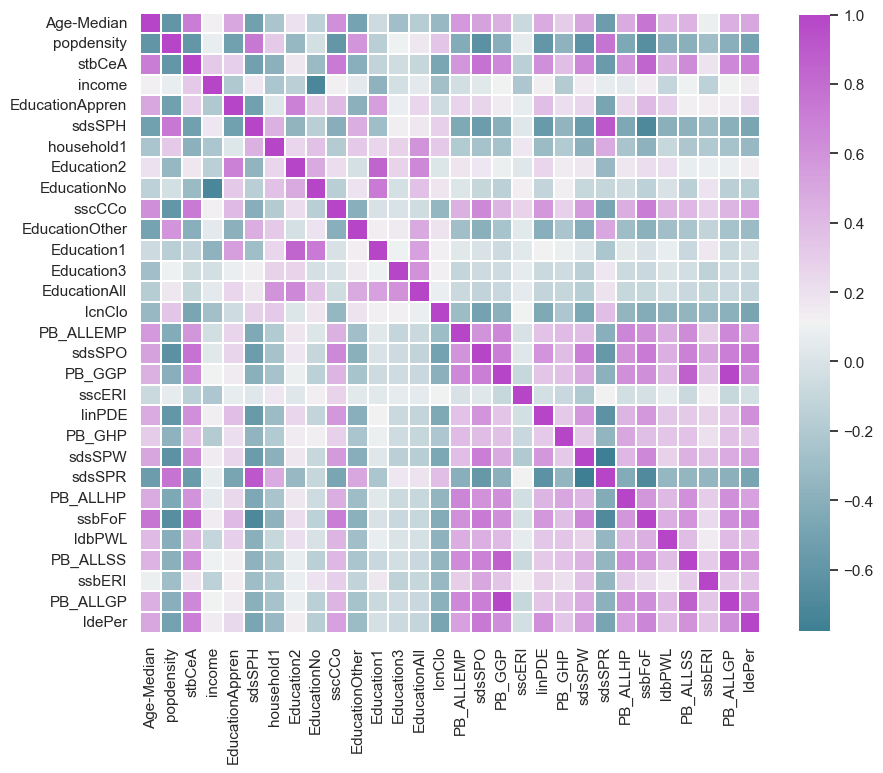

In [ ]:
corr = top_features_corr.corr()
#study correlation of features only isolating and coloring features with negative or positive correlation exceed 0.65 absolute value
plt.figure(figsize=(10,10))
corr = top_features_corr.corr()
cmap=sns.diverging_palette(220, 300, s=75, l=50, sep=1, n=6, as_cmap=True,center='light')
#cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
#cmap = sns.diverging_palette(500,350, s=75, l=50, sep=1, n=6, center='light', as_cmap=True)
sns.heatmap(corr,cmap=cmap,cbar=True,square=True,linewidths=0.05, cbar_kws={"shrink": 0.8})

## Compile Results of For RF Predicted

In [ ]:
import numpy as np
result_rf = pd.DataFrame(np.column_stack([msoa11cd_list, rf_pred_list]), 
                               columns=['MSOA11CD', 'rf_pred'])
result_rf = result_rf.astype({'rf_pred':'float'})

In [ ]:
model_results = pd.merge(result_lasso,result_rf[['MSOA11CD','rf_pred']],how='left',on='MSOA11CD')

In [ ]:
model_results = model_results.rename({'y_pred':'lasso_pred','y_test':'actual'},axis=1)

In [ ]:
model_results.head()

,MSOA11CD,MSOA11NM_x,LONG_,LAT,geometry,ClusterNo,lasso_pred,actual,rf_pred
0,E02000001,City of London 001,-0.093490,51.515600,"POLYGON ((-0.09650 51.52295, -0.09644 51.52282...",1,-1.372061,-1.376296,-0.831893
1,E02000002,Barking and Dagenham 001,0.138756,51.586500,"POLYGON ((0.14810 51.59656, 0.14809 51.59640, ...",1,-0.809608,-0.752241,-1.144560
2,E02000003,Barking and Dagenham 002,0.138149,51.576000,"POLYGON ((0.14847 51.58083, 0.14841 51.58075, ...",1,-0.500162,-0.689836,-0.796376
3,E02000004,Barking and Dagenham 003,0.176828,51.556400,"POLYGON ((0.18511 51.56480, 0.18479 51.56455, ...",1,-0.346033,-0.377808,-0.374123
4,E02000005,Barking and Dagenham 004,0.144267,51.560700,"POLYGON ((0.15187 51.56778, 0.15193 51.56775, ...",1,-0.762161,-0.814647,-1.165810


## Compile Results of All Folds and Accuracy for Mean/Train Test, MSE and MAE

In [ ]:
rf_model_results

,rf_original_train,rf_urban_train,rf_all_train,rf_original_test,rf_urban_test,rf_all_test,KFold Cluster
0,0.984706,0.978240,0.985624,0.829232,0.753323,0.832991,KFold 1
1,0.980557,0.970285,0.981170,0.676229,0.810142,0.705119,KFold 2
2,0.984409,0.978418,0.984625,0.795313,0.714589,0.816780,KFold 3
3,0.983388,0.976082,0.983822,0.831298,0.764049,0.848034,KFold 4


In [ ]:
lasso_model_results

,lasso_original_train,lasso_urban_train,lasso_all_train,lasso_original_test,lasso_urban_test,lasso_all_test,Fold
0,0.859521,0.791614,0.880930,0.818952,0.713828,0.810405,1
1,0.855816,0.742590,0.862575,0.767563,0.780026,0.792003,2
2,0.862610,0.800400,0.879231,0.807830,0.677803,0.823873,3
3,0.854549,0.782824,0.871108,0.811639,0.706119,0.831656,4


In [ ]:
model_accuracy = pd.merge(lasso_model_results,rf_model_results,how='left',left_index=True,right_index=True)
model_accuracy

,lasso_original_train,lasso_urban_train,lasso_all_train,lasso_original_test,lasso_urban_test,lasso_all_test,Fold,rf_original_train,rf_urban_train,rf_all_train,rf_original_test,rf_urban_test,rf_all_test,KFold Cluster
0,0.859521,0.791614,0.880930,0.818952,0.713828,0.810405,1,0.984706,0.978240,0.985624,0.829232,0.753323,0.832991,KFold 1
1,0.855816,0.742590,0.862575,0.767563,0.780026,0.792003,2,0.980557,0.970285,0.981170,0.676229,0.810142,0.705119,KFold 2
2,0.862610,0.800400,0.879231,0.807830,0.677803,0.823873,3,0.984409,0.978418,0.984625,0.795313,0.714589,0.816780,KFold 3
3,0.854549,0.782824,0.871108,0.811639,0.706119,0.831656,4,0.983388,0.976082,0.983822,0.831298,0.764049,0.848034,KFold 4


In [ ]:
m = model_accuracy.melt(id_vars='KFold Cluster',value_vars=['lasso_original_train','lasso_urban_train','lasso_all_train','lasso_original_test','lasso_urban_test','lasso_all_test',
                                  'rf_original_train','rf_urban_train','rf_all_train','rf_original_test','rf_urban_test','rf_all_test'],value_name='Model_Results')

In [ ]:
m = m.loc[m['variable'].str.contains('all',case=False)]

In [ ]:
m.loc[m['variable'].str.contains('train', case=False, na=None), 'Train or Test'] = 'Train'
m.loc[m['variable'].str.contains('test', case=False, na=None), 'Train or Test'] = 'Test'

In [ ]:
m.loc[m['variable'].str.contains('lasso', case=False, na=None), 'ML Model'] = 'Lasso Regression'
m.loc[m['variable'].str.contains('rf', case=False, na=None), 'ML Model'] = 'Random Forest'

In [ ]:
m = m.rename({'Fold_x':'K-Fold Cluster No'},axis=1)
m.head()

,KFold Cluster,variable,Model_Results,Train or Test,ML Model
8,KFold 1,lasso_all_train,0.880930,Train,Lasso Regression
9,KFold 2,lasso_all_train,0.862575,Train,Lasso Regression
10,KFold 3,lasso_all_train,0.879231,Train,Lasso Regression
11,KFold 4,lasso_all_train,0.871108,Train,Lasso Regression
20,KFold 1,lasso_all_test,0.810405,Test,Lasso Regression


In [ ]:
accuracy = pd.pivot_table(m,index=['ML Model','Train or Test'],columns=['KFold Cluster'],  aggfunc='mean', margins=True, margins_name='Final_Result').sort_values(by=["ML Model",'Train or Test'],ascending = [True, False]).reset_index()
accuracy = accuracy.iloc[1:,:]
#accuracy.droplevel('K-Fold Cluster No')
accuracy

ML Model Train or Test Model_Results                    \
KFold Cluster                                       KFold 1  KFold 2  KFold 3   
1              Lasso Regression         Train      0.880930 0.862575 0.879231   
2              Lasso Regression          Test      0.810405 0.792003 0.823873   
3                 Random Forest         Train      0.985624 0.981170 0.984625   
4                 Random Forest          Test      0.832991 0.705119 0.816780   

                                     
KFold Cluster  KFold 4 Final_Result  
1             0.871108     0.873461  
2             0.831656     0.814484  
3             0.983822     0.983810  
4             0.848034     0.800731

## Exploratory Spatial Data Analysis for Predicted Vs Test for Lasso, RF

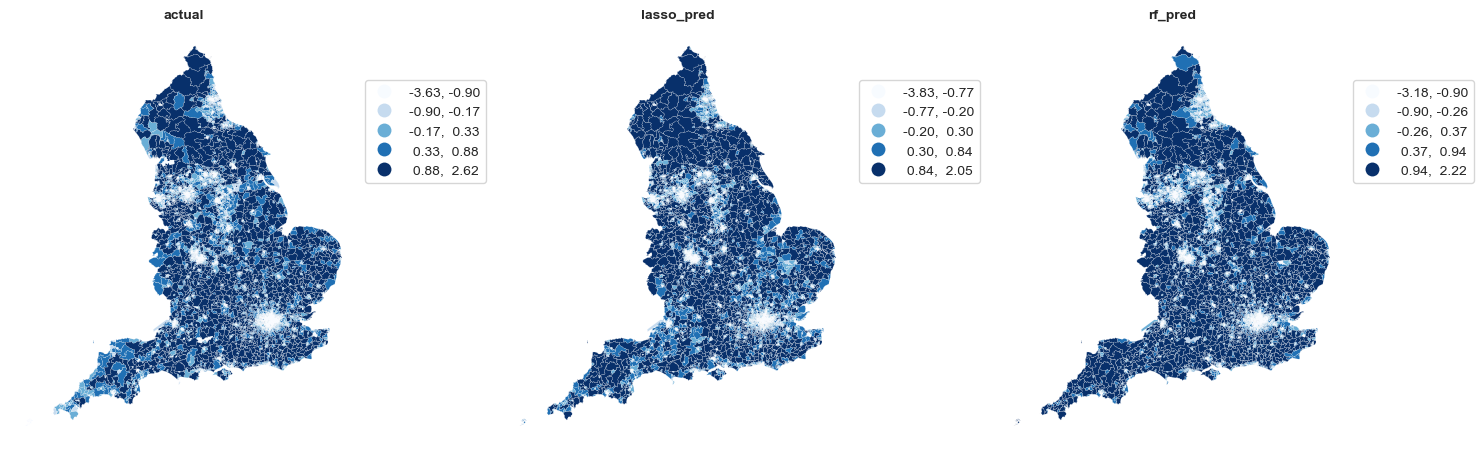

In [ ]:
model_results= gpd.GeoDataFrame(model_results, geometry='geometry')
p_vars= ['actual','lasso_pred','rf_pred']

         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  3#int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    model_results.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'small'}, scheme='quantiles', cmap='Blues', linewidth=0.1,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

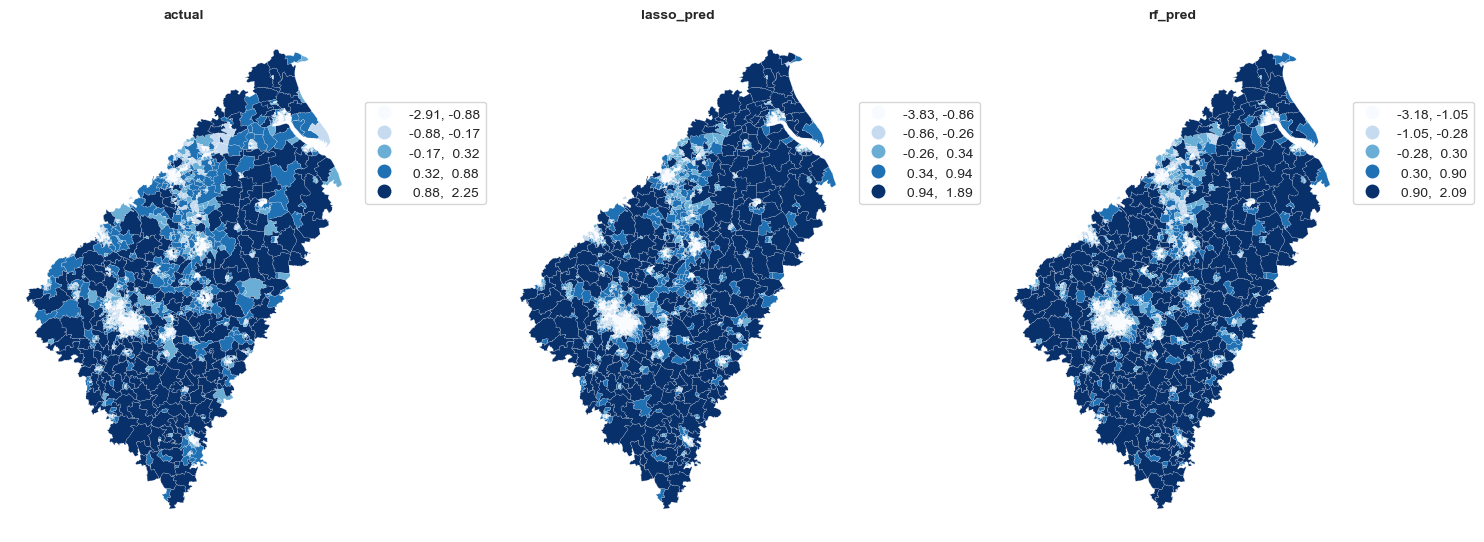

In [ ]:
model_results= gpd.GeoDataFrame(model_results, geometry='geometry')
clust_0 = model_results[model_results['ClusterNo']=='0']
p_vars= ['actual','lasso_pred','rf_pred']

         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  3#int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    clust_0.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'small'}, scheme='quantiles', cmap='Blues', linewidth=0.1,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

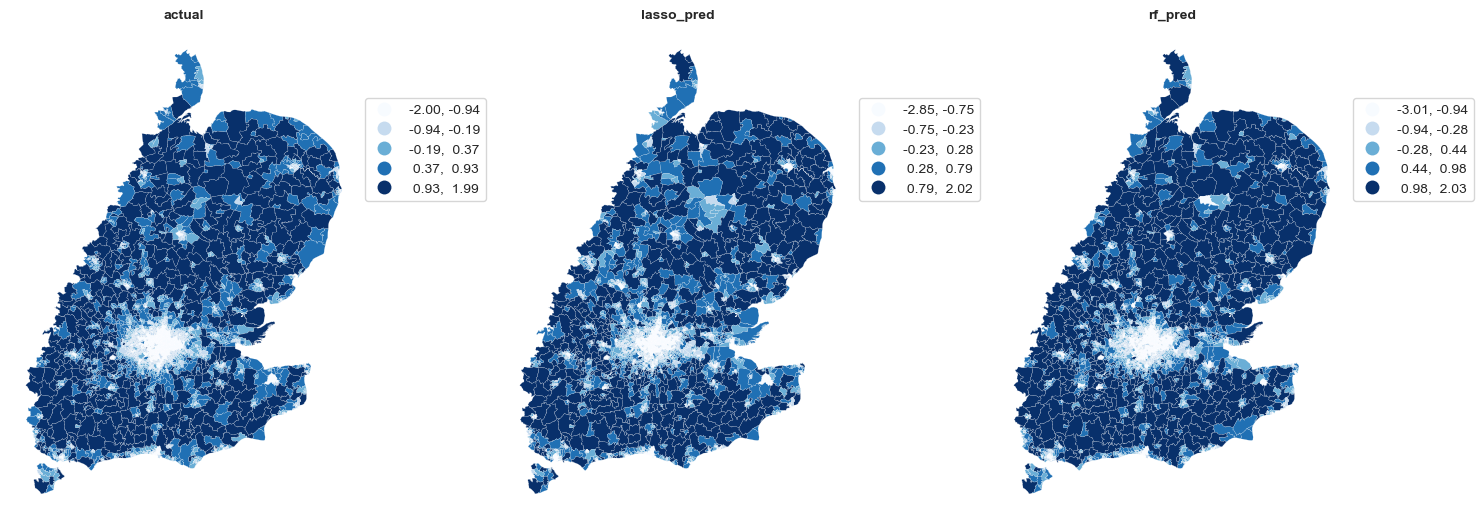

In [ ]:
model_results = gpd.GeoDataFrame(model_results, geometry='geometry')
clust_1 = model_results[model_results['ClusterNo']=='1']
p_vars= ['actual','lasso_pred','rf_pred']

         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  3#int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    clust_1.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'small'}, scheme='quantiles', cmap='Blues', linewidth=0.1,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

### For Cluster 2 or Second Fold we isolate London to quantify which model performs better, we zoom into London

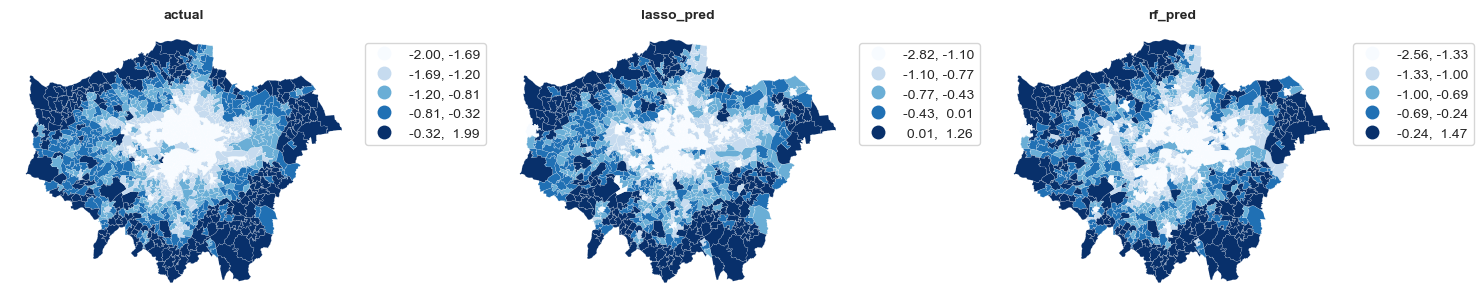

In [ ]:

MSOA_London = pd.read_excel('MSOA London.xlsx') #read excel file to join and isolate area for London to zoom in Cluster 2
London = pd.merge(MSOA_London,model_results,how='inner',left_on = 'MSOA Code',right_on ='MSOA11CD')
London  = gpd.GeoDataFrame(London, geometry='geometry')
p_vars= ['actual','lasso_pred','rf_pred']

         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  3#int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    London.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'small'}, scheme='quantiles', cmap='Blues', linewidth=0.1,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

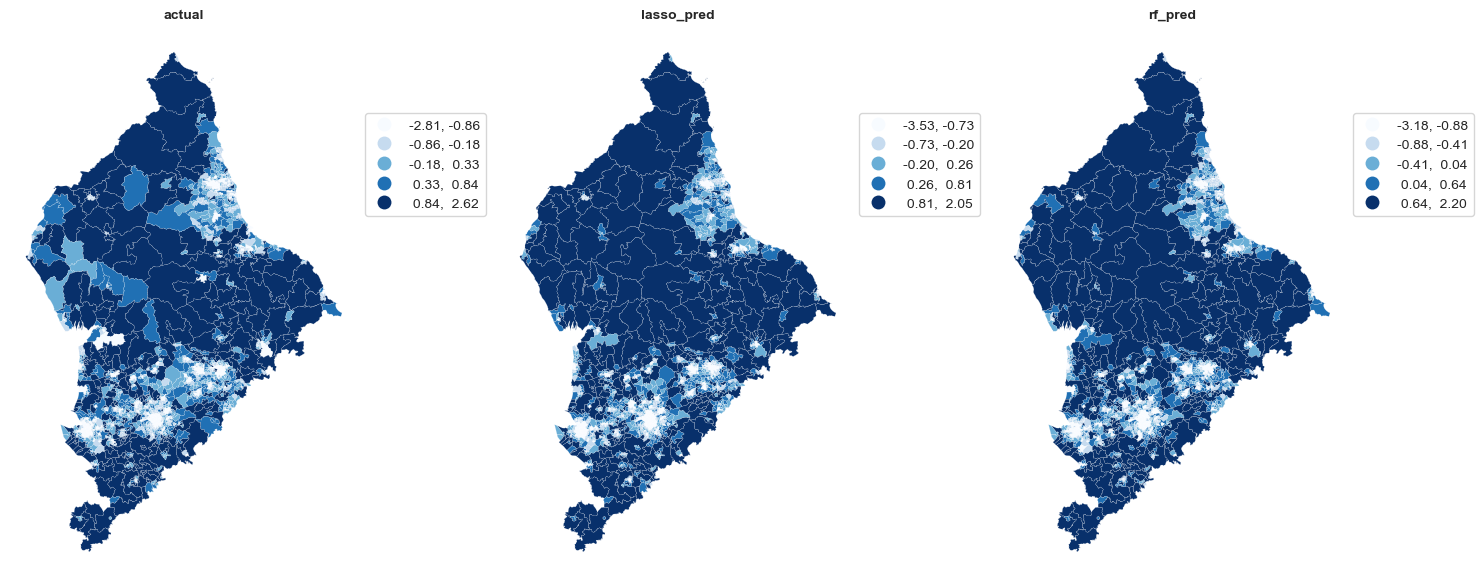

In [ ]:
model_results = gpd.GeoDataFrame(model_results, geometry='geometry')
clust_2 = model_results[model_results['ClusterNo']=='2']
p_vars= ['actual','lasso_pred','rf_pred']

         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  3#int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    clust_2.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'small'}, scheme='quantiles', cmap='Blues', linewidth=0.1,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

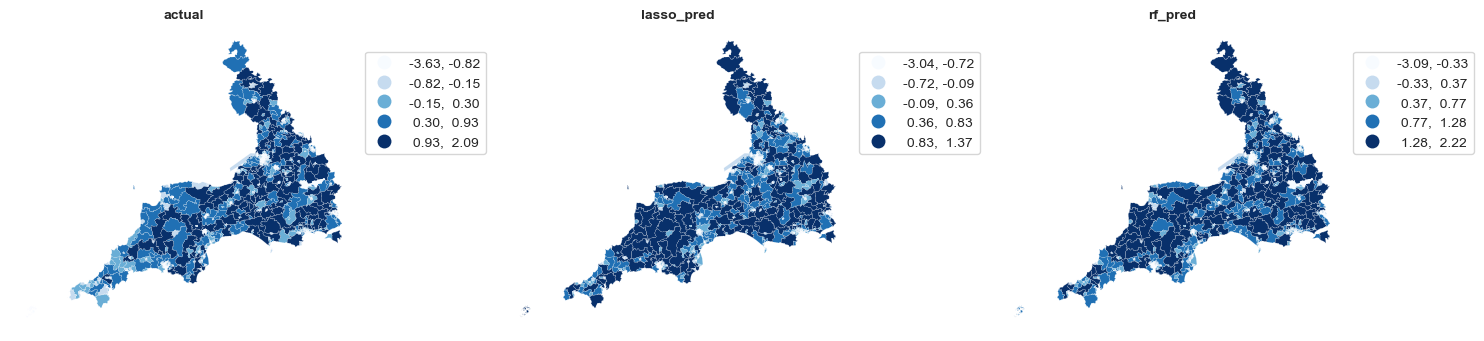

In [ ]:
model_results = gpd.GeoDataFrame(model_results, geometry='geometry')
clust_3 = model_results[model_results['ClusterNo']=='3']
p_vars= ['actual','lasso_pred','rf_pred']

         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  3#int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    clust_3.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'small'}, scheme='quantiles', cmap='Blues', linewidth=0.1,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

## Appendix: Own Notes